In [3]:
from sklearn.decomposition import PCA
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.mixture import GaussianMixture
from sklearn.feature_selection import mutual_info_regression

%matplotlib inline

In [18]:
from sklearn.datasets import load_iris
X, y = load_iris(return_X_y=True)
iris_data = pd.DataFrame(X)
iris_data.columns = ["se_len", "se_wid", "pe_len", "pe_wid"]
iris_data_sc = (iris_data - iris_data.mean())/iris_data.std()

In [10]:
def PMI(i1, i2):
    return mutual_info_regression(iris_data[[i1]], iris_data[i2])[0]

In [11]:
from itertools import combinations

In [12]:
def PMIs(features):
    pairwise_indices = list(combinations(features, 2))
    pmis = []
    for pair in pairwise_indices:
        pmis.append((pair, PMI(*pair)))
    return pmis

In [13]:
PMIs(iris_data.columns)

[((0, 1), 0.28901552206902004),
 ((0, 2), 0.8585698850464332),
 ((0, 3), 0.5861446201888874),
 ((1, 2), 0.35249961173248234),
 ((1, 3), 0.37483619709385785),
 ((2, 3), 1.2113543291026665)]

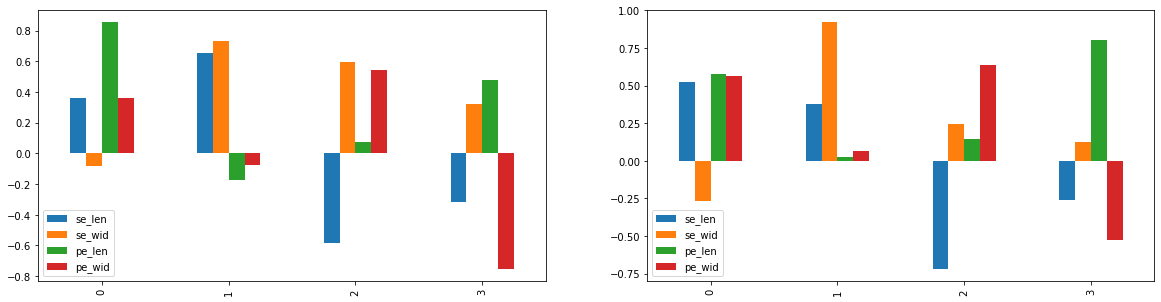

In [21]:
fig, ax = plt.subplots(1,2,figsize =(20,5))

pca = PCA(n_components=4)
lrm = pd.DataFrame(pca.fit_transform(iris_data), columns = ["pc_1", "pc_2", "pc_3", "pc_4"])
pca_sc = PCA(n_components=4)
lrm_sc = pd.DataFrame(pca_sc.fit_transform(iris_data_sc), columns = ["pc_1", "pc_2", "pc_3", "pc_4"])

loadings = pd.DataFrame(pca.components_, columns=iris_data.columns)
loadings.plot(kind="bar", ax=ax[0])
loadings_sc = pd.DataFrame(pca_sc.components_, columns=iris_data.columns)
loadings_sc.plot(kind="bar", ax=ax[1])

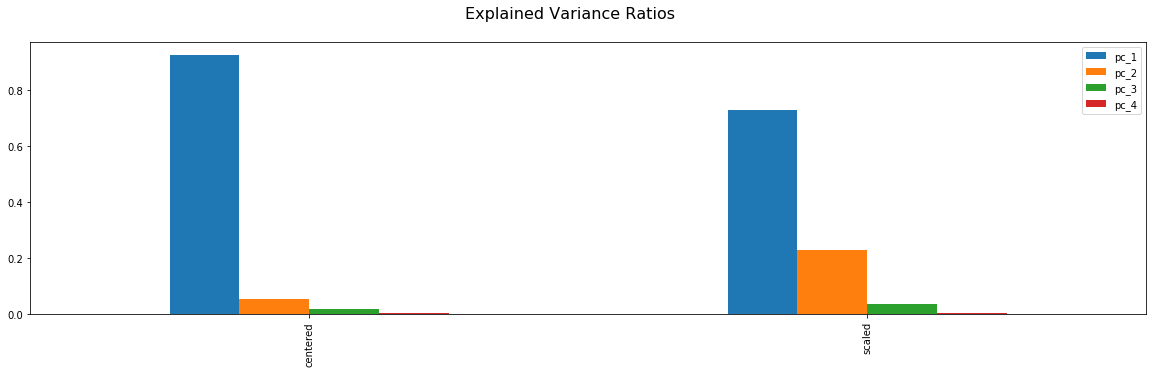

In [22]:
fig, ax = plt.subplots(1,1,figsize =(20,5))
fig.suptitle(f'Explained Variance Ratios', fontsize=16)
exV = pd.DataFrame([pd.Series(pca.explained_variance_ratio_), pd.Series(pca_sc.explained_variance_ratio_)])
exV.columns = ["pc_1", "pc_2", "pc_3", "pc_4"]
exV.index = ["centered", "scaled"]
exV.plot(kind="bar", ax=ax)
fig.savefig("../data/exV.png")

In [24]:
def coherence(lrm_vector):
    coherence_value = 0
    for pmi in PMIs(iris_data.columns):
        (feature_1, feature_2), value = pmi
        loading_feature_1 = lrm_vector[feature_1]
        loading_feature_2 = lrm_vector[feature_2]
        coherence_value += np.abs(loading_feature_1)*np.abs(loading_feature_2)*value
    return coherence_value

In [26]:
for i in range(4):
    print(coherence(loadings.T[i]))
print()
for i in range(4):
    print(coherence(loadings_sc.T[i]))

0.7762176847925658
0.35785651550461506
0.5528525365742163
0.9011822567398358

0.9948700552236828
0.16570463198418012
0.5949991047571085
0.8414920986013514


No handles with labels found to put in legend.


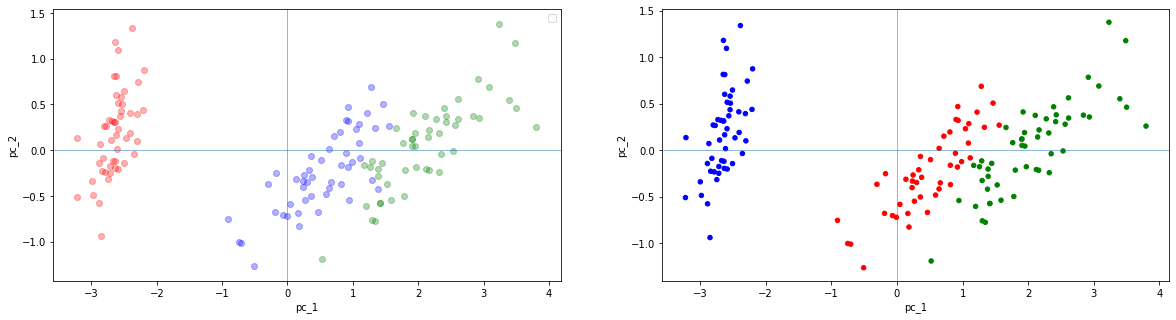

In [32]:
fig, ax = plt.subplots(1,2,figsize=(20,5))
features = ["pc_1", "pc_2"]
gmm = GaussianMixture(n_components=3)
model = lrm
labels = gmm.fit_predict(model[features])
# accuracy = np.mean(np.array(["red" if label == 0 else "green" for label in labels]) == np.array(["red" if label == 1 else "green" for label in wholesale_data.Channel]))
# fig.suptitle(f'GMM prepared on raw data to LRM // acc: {round(accuracy, 3)}', fontsize=16)
colors = ["red", "blue", "green"]
for val in set(y):
    topic_1 = model[y == val][features[0]].values
    topic_2 = model[y == val][features[1]].values
    color = colors[val]
    ax[0].scatter(topic_1, topic_2, c=color, alpha=0.3)

model.plot(kind="scatter", x=features[0], y=features[1], c=[colors[label] for label in labels], ax=ax[1])
ax[0].set_xlabel('pc_1')
ax[0].set_ylabel('pc_2')
ax[0].axvline(linewidth=0.5)
ax[0].axhline(linewidth=0.5)
ax[1].axvline(linewidth=0.5)
ax[1].axhline(linewidth=0.5)
ax[0].legend()
fig.savefig("../data/plt1.png")

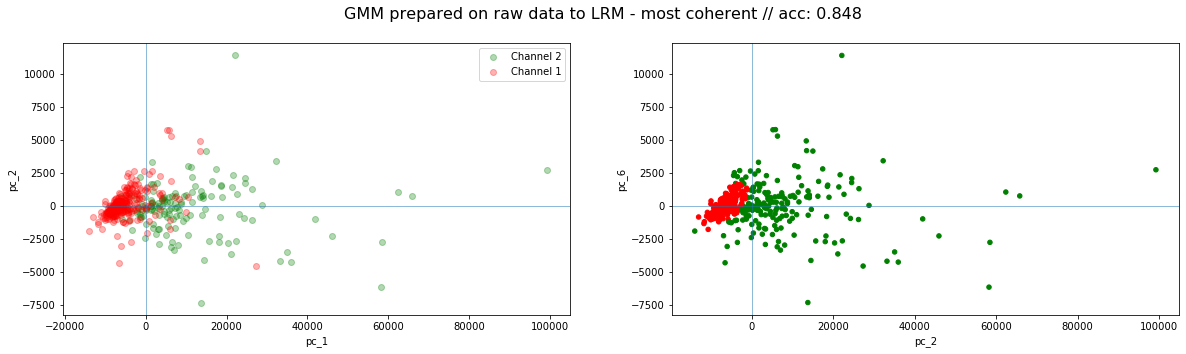

In [98]:
fig, ax = plt.subplots(1,2,figsize=(20,5))
features = ["pc_2", "pc_6"]
gmm = GaussianMixture(n_components=2)
model = lrm
labels = gmm.fit_predict(model[features])

accuracy = np.mean(np.array(["red" if label == 0 else "green" for label in labels]) == np.array(["red" if label == 1 else "green" for label in wholesale_data.Channel]))
fig.suptitle(f'GMM prepared on raw data to LRM - most coherent // acc: {round(accuracy, 3)}', fontsize=16)

for val in wholesale_data.Channel.unique():
    topic_1 = model[wholesale_data.Channel == val][features[0]].values
    topic_2 = model[wholesale_data.Channel == val][features[1]].values
    color = "red" if val == 1 else "green"
    label = "Channel 1" if val == 1 else "Channel 2"
    ax[0].scatter(topic_1, topic_2, c=color, alpha=0.3, label=label)

model.plot(kind="scatter", x=features[0], y=features[1], c=["red" if label == 0 else "green" for label in labels], ax=ax[1])

ax[0].set_xlabel('pc_1')
ax[0].set_ylabel('pc_2')
ax[0].axvline(linewidth=0.5)
ax[0].axhline(linewidth=0.5)
ax[1].axvline(linewidth=0.5)
ax[1].axhline(linewidth=0.5)
ax[0].legend()
fig.savefig("../data/plt2.png")

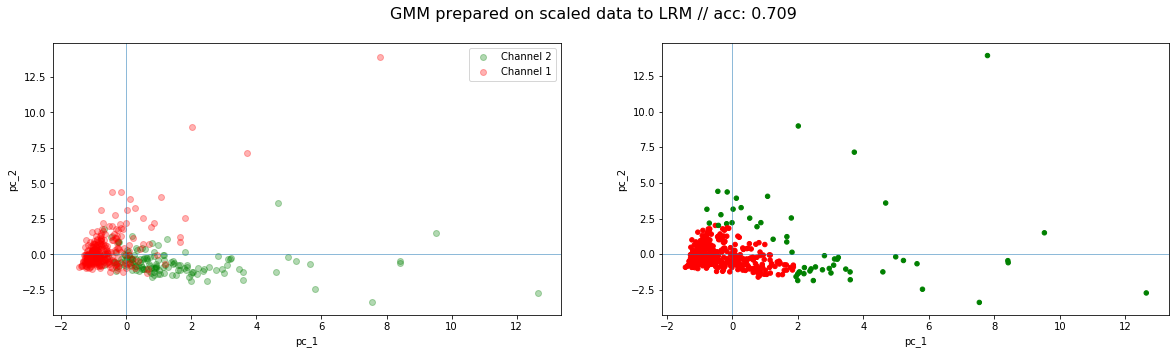

In [100]:
fig, ax = plt.subplots(1,2,figsize=(20,5))
features = ["pc_1", "pc_2"]
gmm = GaussianMixture(n_components=2)
model = lrm_sc
labels = gmm.fit_predict(model[features])

accuracy = np.mean(np.array(["red" if label == 0 else "green" for label in labels]) == np.array(["red" if label == 1 else "green" for label in wholesale_data.Channel]))
fig.suptitle(f'GMM prepared on scaled data to LRM // acc: {round(accuracy, 3)}', fontsize=16)

for val in wholesale_data.Channel.unique():
    topic_1 = model[wholesale_data.Channel == val][features[0]].values
    topic_2 = model[wholesale_data.Channel == val][features[1]].values
    color = "red" if val == 1 else "green"
    label = "Channel 1" if val == 1 else "Channel 2"
    ax[0].scatter(topic_1, topic_2, c=color, alpha=0.3, label=label)

model.plot(kind="scatter", x=features[0], y=features[1], c=["red" if label == 0 else "green" for label in labels], ax=ax[1])

ax[0].set_xlabel('pc_1')
ax[0].set_ylabel('pc_2')
ax[0].axvline(linewidth=0.5)
ax[0].axhline(linewidth=0.5)
ax[1].axvline(linewidth=0.5)
ax[1].axhline(linewidth=0.5)
ax[0].legend()
fig.savefig("../data/plt3.png")

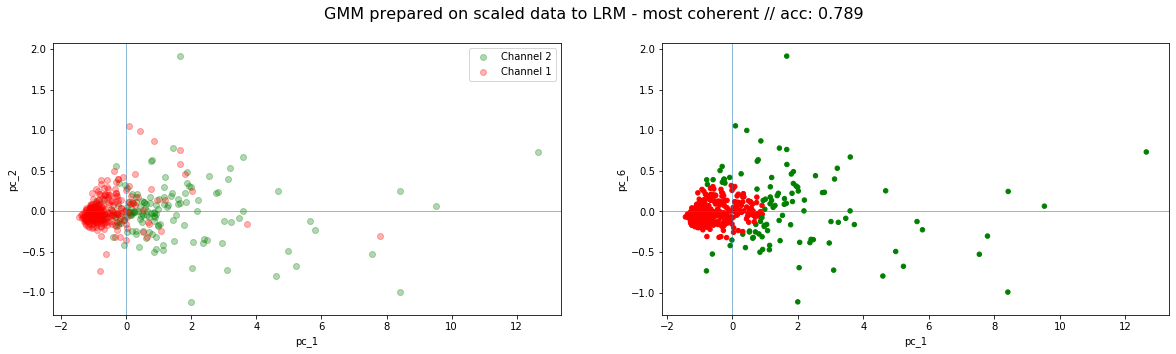

In [101]:
fig, ax = plt.subplots(1,2,figsize=(20,5))
features = ["pc_1", "pc_6"]
gmm = GaussianMixture(n_components=2)
model = lrm_sc
labels = gmm.fit_predict(model[features])

accuracy = np.mean(np.array(["red" if label == 0 else "green" for label in labels]) == np.array(["red" if label == 1 else "green" for label in wholesale_data.Channel]))
fig.suptitle(f'GMM prepared on scaled data to LRM - most coherent // acc: {round(accuracy, 3)}', fontsize=16)

for val in wholesale_data.Channel.unique():
    topic_1 = model[wholesale_data.Channel == val][features[0]].values
    topic_2 = model[wholesale_data.Channel == val][features[1]].values
    color = "red" if val == 1 else "green"
    label = "Channel 1" if val == 1 else "Channel 2"
    ax[0].scatter(topic_1, topic_2, c=color, alpha=0.3, label=label)

model.plot(kind="scatter", x=features[0], y=features[1], c=["red" if label == 0 else "green" for label in labels], ax=ax[1])

ax[0].set_xlabel('pc_1')
ax[0].set_ylabel('pc_2')
ax[0].axvline(linewidth=0.5)
ax[0].axhline(linewidth=0.5)
ax[1].axvline(linewidth=0.5)
ax[1].axhline(linewidth=0.5)
ax[0].legend()
fig.savefig("../data/plt4.png")